In [1]:
import pandas as pd

reviews = pd.read_csv('Arabic_Reviews.csv', encoding= 'utf-8')

reviews.head()

,reviews
0,رائع
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...
3,لماذا لا يمكننا طلب من ماكدونالدز؟
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...


In [2]:
positive = pd.read_csv('positive.csv', encoding = 'utf-8')
positive.head()

,score,word
0,3,ممتاز
1,3,رائع
2,3,مبهر
3,3,جميل
4,3,ساحر


In [3]:
negative = pd.read_csv('negative.csv', encoding = 'utf-8')
negative.tail()

,score,word
1114,-2,صعب
1115,-3,الخيبه
1116,-1,فاحش
1117,-2,زائد
1118,-3,مخيسة


In [4]:
!pip install nltk

In [5]:
!pip install snowballstemmer

In [6]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from snowballstemmer import stemmer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")
    return text

In [8]:
def cleaningText(text):
    
    numbers="0123456789"
    arabic_punctuation='''`÷×؛<>_()*^ـ،/:"؟.,'~¦+|!”…“–ـ'''
    english_punctuation=string.punctuation
    
    del_chars=english_punctuation+arabic_punctuation+numbers
    text = remove_chars(text, del_chars)
     
    text = text.replace('\n', ' ')  
       
    text = text.strip(' ')  
    return text

In [9]:
def filteringText(tokens_list):  
    
    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered

In [10]:
def toSentence(words_list):  
    sentence = ' '.join(word for word in words_list)
    return sentence

In [11]:
def stemmingText(tokens_list): 
    
    ar_stemmer = stemmer("arabic")
    tokens_list_stem = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list_stem

In [12]:
ar_stemmer = stemmer("arabic")

stem = ar_stemmer.stemWord("رايع")
print (stem)

stem = ar_stemmer.stemWord("رائع")
print (stem)

stem = ar_stemmer.stemWord("رائعون")
print (stem)

stem = ar_stemmer.stemWord("رائعين")
print (stem)

رايع
رايع
رايع
رايع


In [13]:
text= "احب التطبيق واستمتع باستخدامه، حيث انه يوجد به الكثير من الاختيارات والعروض المميزة! "
print(text)

text=cleaningText(text)
print(text)

tokens_list=word_tokenize(text)
print(tokens_list)

tokens_list=filteringText(tokens_list)
print(tokens_list)

tokens_list=stemmingText(tokens_list)
print(tokens_list)

احب التطبيق واستمتع باستخدامه، حيث انه يوجد به الكثير من الاختيارات والعروض المميزة! 
احب التطبيق واستمتع باستخدامه حيث انه يوجد به الكثير من الاختيارات والعروض المميزة
['احب', 'التطبيق', 'واستمتع', 'باستخدامه', 'حيث', 'انه', 'يوجد', 'به', 'الكثير', 'من', 'الاختيارات', 'والعروض', 'المميزة']
['احب', 'التطبيق', 'واستمتع', 'باستخدامه', 'انه', 'يوجد', 'الكثير', 'الاختيارات', 'والعروض', 'المميزة']
['احب', 'تطبيق', 'واستمتع', 'باستخدام', 'انه', 'يوجد', 'كثير', 'اختيار', 'والعروض', 'مميز']


In [14]:
def text_preprocessing(text):
    text = cleaningText(text)
    tokens = word_tokenize(text)
    tokens = filteringText(tokens)
    tokens = stemmingText(tokens)
    return tokens


In [15]:
reviews['review_preprocessed'] = reviews['reviews'].apply(text_preprocessing)
reviews.drop_duplicates(subset = 'review_preprocessed', inplace=True)

In [16]:
positive['word_preprocessed'] = positive['word'].apply(text_preprocessing)
positive['word_preprocessed'] = positive['word_preprocessed'].apply(toSentence)

positive.drop_duplicates(subset = 'word_preprocessed', inplace=True)
positive.dropna(subset = 'word_preprocessed', inplace=True)

In [17]:
negative['word_preprocessed'] = negative['word'].apply(text_preprocessing)
negative['word_preprocessed'] = negative['word_preprocessed'].apply(toSentence)

negative.drop_duplicates(subset = 'word_preprocessed', inplace=True)
negative.dropna(subset = 'word_preprocessed', inplace=True)

In [18]:
dict_positive = dict()

for _, row in positive.iterrows():
    word = row['word_preprocessed'].strip()
    dict_positive[word] = int(row['score'])

dict_negative = dict()

for _, row in negative.iterrows():
    word = row['word_preprocessed'].strip()
    dict_negative[word] = int(row['score'])

In [19]:
def get_polarity(words_list):
    score = 0
    for word in words_list:
        if (word in dict_positive):
            score = score + dict_positive[word]
    for word in words_list:
        if (word in dict_negative):
            score = score + dict_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [20]:
for idx, row in reviews.iterrows():
    reviews_words = reviews.loc[idx, 'review_preprocessed']
    score, polarity = get_polarity(reviews_words)
    reviews.loc[idx, 'polarity_score'] = score
    reviews.loc[idx, 'polarity'] = polarity

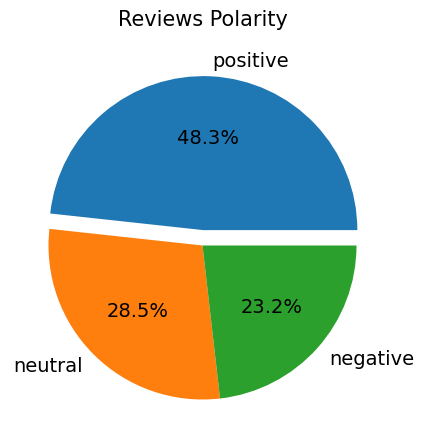

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5, 5))
x = reviews['polarity'].value_counts()
labels = reviews['polarity'].value_counts().index
explode = (0.1, 0 ,0)

ax.pie(x=x, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

ax.set_title('Reviews Polarity', fontsize= 15, pad = 20)
plt.show()

In [22]:
positive_reviews = reviews[reviews['polarity']== 'positive']
positive_reviews = positive_reviews.sort_values(by = 'polarity_score', ascending = False)

positive_reviews[['reviews', 'polarity_score']].head()

,reviews,polarity_score
30512,روعه روعه روعه روعه روعه روعه روعه روعه روعه ر...,174.0
13139,تحفه جدا اتمني تجربوه انا عندي قناه علي اليوتي...,130.0
27467,روعة روعة روعة روعة روعة روعة روعة روعة روعة ر...,105.0
39651,الي/ السيد الاستاذ رئيس مجلس إدارة شركة طلعت م...,64.0
39560,تمام تمام تمام تمام تمام تمام تمام تمام تمام ت...,48.0


In [23]:
negative_reviews = reviews[reviews['polarity']== 'negative']
negative_reviews = negative_reviews.sort_values(by = 'polarity_score', ascending = False)

negative_reviews[['reviews', 'polarity_score']].head()

,reviews,polarity_score
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1.0
16220,الواحد بقى مدمن كنتاكي 😍😍😍,-1.0
15973,ليش التوصيل مش مجاني؟؟؟,-1.0
15977,رااااائع بمعنى الكلمة للأمام دائما 💪,-1.0
15992,سعر التوصيل افضل من هنقرستيشن,-1.0


In [24]:
!pip install wordcloud

In [25]:
!pip install arabic_reshaper

In [26]:
!pip install python-bidi

In [27]:
!pip install --upgrade pillow

In [28]:
!pip install --upgrade wordcloud

In [29]:
import os
print(os.path.exists("Arial.ttf"))

False


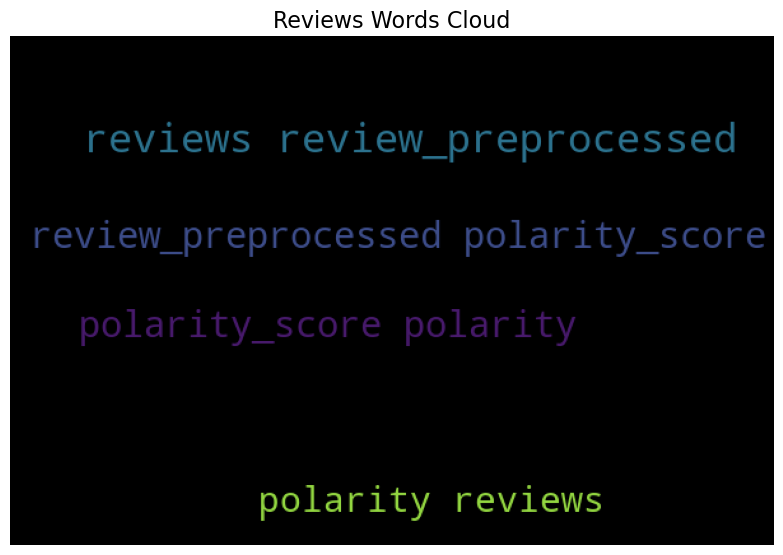

In [30]:
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from matplotlib import rcParams

list_words = ''
i=0

for review in reviews['review_preprocessed']:
    for word in reviews:
        i = i+1
        if i>100:
            break
        list_words += ' '+(word)

reshaped = arabic_reshaper.reshape(list_words)
artext = get_display(reshaped)

wordcloud = WordCloud(width=600, height=400, background_color='black', min_font_size=10).generate(artext)


fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Reviews Words Cloud', fontsize=16)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [31]:
# wordcloud = WordCloud(font_path="DroidSansMono.ttf", width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(artext)

OSError: cannot open resource

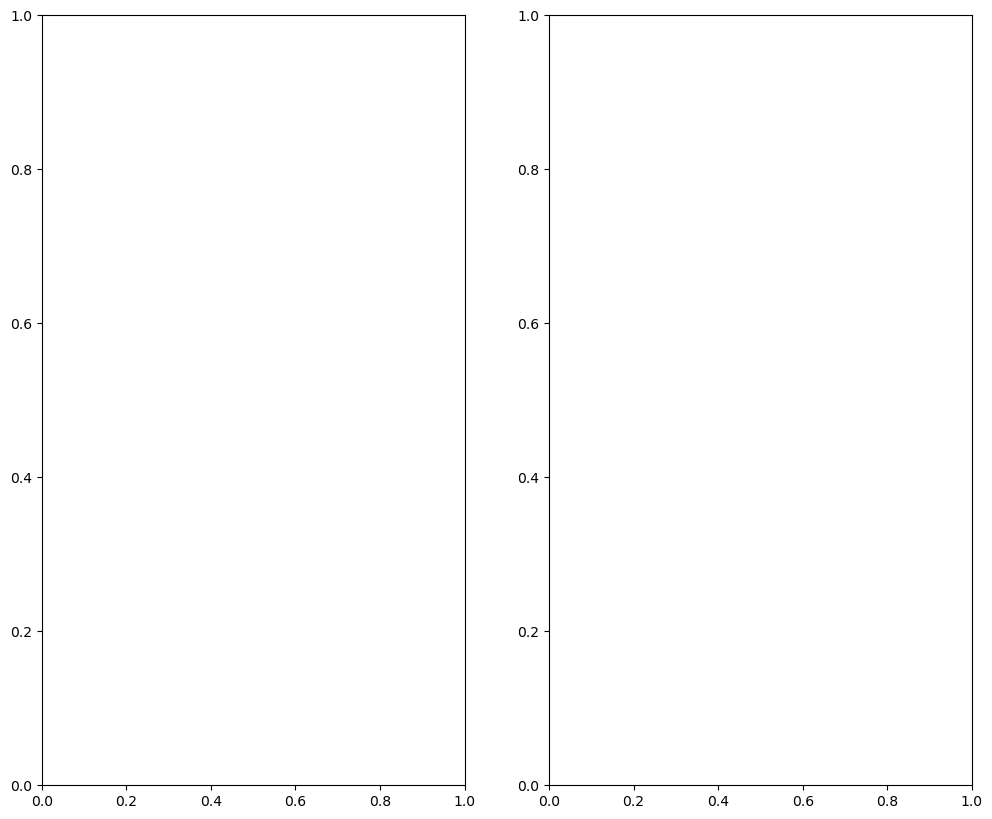

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
positive_words = positive['word']
negative_words = negative['word']

list_positive_words = ''
for word in  positive_words.values:
    list_positive_words += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_positive_words)
artext = get_display(reshaped_text)

wordcloud_positive = WordCloud(font_path='DroidSansMono.ttf',
                               width = 800, height = 600, 
                               background_color = 'black', 
                               colormap = 'Greens',
                               min_font_size = 10).generate(artext)

ax[0].set_title(' Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_negative_words =''
for word in negative_words.values:
    list_negative_words += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_negative_words)
artext = get_display(reshaped_text)

wordcloud = WordCloud(font_path="NotoNaskhArabic-Regular.ttf",
                      width=600, height=400, background_color='black', min_font_size=10).generate(artext)

ax[1].set_title('Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [35]:
reviews.head()

,reviews,review_preprocessed,polarity_score,polarity
0,رائع,[رايع],3.0,positive
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,"[رنامج, رايع, جدا, يساعد, تلب, احتياج, شكل, اسرع]",6.0,positive
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,"[تطبيق, يغتح, دايم, يعط, يوجد, اتصال, شبكةمع, ...",-1.0,negative
3,لماذا لا يمكننا طلب من ماكدونالدز؟,"[لماذ, يمك, طلب, ماكدونالدز]",0.0,neutral
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,"[برنامج, يظهر, مطاعم, مغلق, انه, تكون, فاتح, ق...",0.0,neutral


In [40]:
sentences = ['Artificial Intelligence Learning', 
                'Human Intelligence', 
                "Machine Learning", 
                "Deep Learning"]

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words =10)
tokenizer.fit_on_texts(sentences)
print(tokenizer.word_index)

{'learning': 1, 'intelligence': 2, 'artificial': 3, 'human': 4, 'machine': 5, 'deep': 6}


In [41]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[3, 2, 1], [4, 2], [5, 1], [6, 1]]


In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pads = pad_sequences(sequences, maxlen=3)
print(pads)

[[3 2 1]
 [0 4 2]
 [0 5 1]
 [0 6 1]]


In [43]:
sentences = reviews['review_preprocessed'].apply(toSentence)
sentences

0                                                     رايع
1                 رنامج رايع جدا يساعد تلب احتياج شكل اسرع
2        تطبيق يغتح دايم يعط يوجد اتصال شبكةمع انه النت...
3                                  لماذ يمك طلب ماكدونالدز
4        برنامج يظهر مطاعم مغلق انه تكون فاتح قال كده ا...
                               ...                        
40016                                     تحذير استخدم شرك
40017                                        اسوء تجرب سفر
40018                             تجرب مروع خدم عملاء رهيب
40019                                 اسوء خدم حافلا مدارس
40032                              حافل خير سايق قحون الاح
Name: review_preprocessed, Length: 36963, dtype: object

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
sequence_max = 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sentences.values)
seq = tokenizer.texts_to_sequences(sentences.values)
x = pad_sequences(seq, maxlen=sequence_max)

In [46]:
print(sentences.values[25])
print(x[25])

مت عجب لان بن نادر اشوف شي محل دفع نقد
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 3766  486
   49  977 1834  688   46  330  132 1364]


In [49]:
polarity_encode = {'negative' : 0, 'neutral': 1, 'positive': 2}
y = reviews['polarity'].map(polarity_encode).values

In [50]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x, y, random_state=0)

In [52]:
import numpy as np

pos_count = np.count_nonzero(y_train==2)
neg_count = np.count_nonzero(y_train==0)
neu_count = np.count_nonzero(y_train==1)
print(pos_count, neg_count, neu_count)


1496 395931 1844


In [57]:
total_3 = (pos_count+ neg_count+ neu_count)/3
weight_0 = total_3 / neg_count
weight_1 = total_3 / neu_count
weight_2 = total_3 / pos_count

print(weight_0, weight_1, weight_2)
class_weight = {0: weight_0, 1: weight_1, 2:weight_2}

0.33614527110363507 72.17480115690529 88.9641265597148


In [58]:
from keras.models import Sequential
from keras.layers import Input, Embedding, Dense, LSTM
from keras.optimizers import Adam

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2
learning_rate = 0.001

model = Sequential()
model.add(Input(shape=(sequence_max, )))
model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = sequence_max))
model.add(LSTM(units= hidden_unit, dropout = dropout_rate))
model.add(Dense(units= 3, activation= 'softmax'))

In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=learning_rate), 
              metrics= ['accuracy'])

In [60]:
epochs = 10
batch_size = 128

history = model.fit(x_train, y_train, class_weight=class_weight, epochs=epochs, 
                    batch_size=batch_size, validation_data=(x_test, y_test))

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 27722
'y' sizes: 9241
'sample_weight' sizes: 9241


In [61]:
print(len(x), len(y))  # Should print the same number

36963 36963


In [62]:
print(len(x_train), len(y_train))  # Should be equal
print(len(x_test), len(y_test))    # Should be equal

27722 9241
27722 9241


In [66]:
x = x[:len(y)]

In [67]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x, y, random_state=0)

In [68]:
#alueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 27722'y' sizes: 9241'sample_weight' sizes: 9241

print(len(x_train), len(y_train))  # Should be equal
print(len(x_test), len(y_test))    # Should be equal

27722 9241
27722 9241


In [69]:
##Reset Data and Re-Split
x = x[:min(len(x), len(y))]
y = y[:min(len(x), len(y))]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
print(len(x_train), len(y_train))  # Should be equal
print(len(x_test), len(y_test)) 

29570 29570
7393 7393


In [72]:
epochs = 10
batch_size = 128

history = model.fit(x_train, y_train, class_weight=class_weight, epochs=epochs, 
                    batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5260 - loss: 40.1027 - val_accuracy: 0.6955 - val_loss: 1.3325
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7100 - loss: 13.7872 - val_accuracy: 0.7146 - val_loss: 1.3142
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7374 - loss: 8.4215 - val_accuracy: 0.7154 - val_loss: 1.3399
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7447 - loss: 5.7842 - val_accuracy: 0.7162 - val_loss: 1.3850
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7532 - loss: 4.5597 - val_accuracy: 0.7196 - val_loss: 1.4268
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7511 - loss: 3.7128 - val_accuracy: 0.7176 - val_loss: 1.3844
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7581 - loss: 2.8579 - val_accuracy: 0.7191 - val_loss: 1.4055
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7659 - loss: 2.4137 - val_ac

In [73]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Train Accuracy: 0.7629016041755676
Validation Accuracy: 0.7189233303070068


In [74]:
def create_model(embed_dim=32, hidden_unit = 16, dropout_rate = 0.2, learning_rate = 0.001):

    model = Sequential()
    model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = sequence_max))
    model.add(LSTM(units= hidden_unit, dropout = dropout_rate))
    model.add(Dense(units= 3, activation= 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=learning_rate), 
              metrics= ['accuracy'])
    return model

In [75]:
!pip install scikeras

In [76]:
from scikeras.wrappers import KerasClassifier
model_keras = KerasClassifier(model = create_model, epochs=25, batch_size=128)

In [78]:
param_grid ={
    'model_embed_dim': [32, 64],
    'model_hidden_unit': [16, 32, 64],
    'model_dropout_rate': [0.2, 0.5],
    'model_learning_rate': [0.01, 0.001, 0.0001]
}

In [83]:
# from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(estimator = model_keras, param_grid = param_grid, cv = 5)
# grid_result = grid.fit(x_train, y_train)

# results_df = pd.DataFrame(grid_result.cv_results_)

# results_df.to_csv('grid_search_results.csv', index=False)

# print("Best parameters: ", grid_result.best_params_)

# print("Best accuracy: ", grid_result.best_score_)

In [84]:
model = create_model(embed_dim=64, hidden_unit = 64, dropout_rate = 0.2, learning_rate = 0.001)

history = model.fit(x_train, y_train, class_weight=class_weight, epochs=epochs, 
                    batch_size=batch_size, validation_data=(x_test, y_test))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.5823 - loss: 34.2705 - val_accuracy: 0.6992 - val_loss: 1.5104
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.7159 - loss: 11.2953 - val_accuracy: 0.7164 - val_loss: 1.4370
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7384 - loss: 7.6214 - val_accuracy: 0.7109 - val_loss: 1.3844
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.7431 - loss: 6.0786 - val_accuracy: 0.7170 - val_loss: 1.3379
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7559 - loss: 4.1788 - val_accuracy: 0.7180 - val_loss: 1.2800
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7609 - loss: 2.9379 - val_accuracy: 0.7200 - val_loss: 1.2578
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.7641 - loss: 2.3081 - val_accuracy: 0.7195 - val_loss: 1.1461
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7622 - loss: 2.1880 - val_

In [85]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Train Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Train Accuracy: 0.7643895745277405
Validation Accuracy: 0.7206817269325256


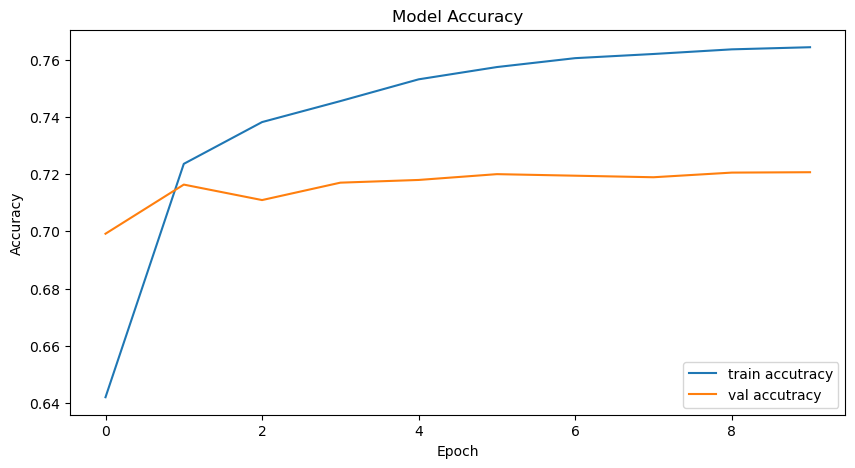

In [88]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(history.history['accuracy'], label = 'train accutracy')
ax.plot(history.history['val_accuracy'], label = 'val accutracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc= 'lower right')
plt.show()

In [89]:
model.save('Analyze_reviews_model.keras')

In [90]:
import pickle

tokenizer_path = 'reviews_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [99]:
from keras.models import load_model
import pickle

def classify_reviews(reviews, model_path, tkenizer_path, sequence_max):
    processed_reviews = []
    for x in reviews:
        y = text_preprocessing(x)
        y= toSentence(y)
        processed_reviews.append(y)

    model = load_model(model_path)
    with open(tokenizer_path, 'rb') as file:
       tokenizer = pickle.load(file)

    txt_to_seq = tokenizer.texts_to_sequences(processed_reviews)
    txt_pad = pad_sequences(txt_to_seq, maxlen= sequence_max)

    predictions = model.predict(txt_pad)

    sentiments = []
    for pred in predictions:
        max = np.argmax(pred, axis=0)
        if max == 0:
           sentiments.append('negative')
        elif max == 1:
           sentiments.append('neutral')
        else:
           sentiments.append('positive')
    return sentiments

In [100]:
test = ['تطبيق فاشل', 'تجربه ناجحه معه طلبات احسنتم', 'عذرا أيش الفائدة معظم المواقع يتعذر التوصيل لها ، خاصاً محلات البقالة قليله في البرنامج، المطاعم موجوده بكثرة ،.. خدمه ممتازه لكن يحتاج لها التطوير']

In [101]:
predictions = classify_reviews(reviews, 'Analyze_reviews_model.keras', 'reviews_tokenizer', 50)
for sentence, prediction in zip(test, predictions):
    print(f'Sentence: {sentence} - Sentiment: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
Sentence: تطبيق فاشل - Sentiment: neutral
Sentence: تجربه ناجحه معه طلبات احسنتم - Sentiment: neutral
Sentence: عذرا أيش الفائدة معظم المواقع يتعذر التوصيل لها ، خاصاً محلات البقالة قليله في البرنامج، المطاعم موجوده بكثرة ،.. خدمه ممتازه لكن يحتاج لها التطوير - Sentiment: neutral
